In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [4]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Plag-Liq')
myPlags1=out['Plags']
myLiquids1=out['Liqs']
Plag_Glass=out['my_input']
notinLEPR= Plag_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Plag_Glass['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myPlags1, P=Plag_Glass['P_kbar_x'], T=Plag_Glass['T_K_x'])
# Keith suggests best equilibrium test is Observed Kd (Ab-An)
Eq_Mask=Plag_Glass['T_K_x']>0
xT=Plag_Glass['T_K_x'].loc[Press_new&Eq_Mask]
xH=Plag_Glass['H2O_Liq'].loc[Press_new&Eq_Mask]

x=Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]

#Filt=Press_new&Eq_Mask

C:\Users\penny\AppData\Local\Temp\ipykernel_30932\956958163.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## Assesing sensitivity to H2O content and other variables

In [5]:
#Filt=[596, 624, 700, 415, 354, 309, 525, 618, 513, 478, 631, 291, 290,
       # 541, 430, 675, 505, 318, 359, 378, 522, 358, 562, 564, 651, 514,
       # 637, 384, 498, 372, 344, 456, 315, 573, 282, 662, 338]

In [6]:
rand_choice=Plag_Glass.loc[Plag_Glass['H2O_Liq']>0].index.values
choose=np.random.choice(rand_choice, 40)
Filt=[616, 647,  13,  34,  76, 505, 262, 240, 437, 551, 474, 291, 337,
        92, 705, 242, 628, 464, 353, 370, 392, 256, 218, 642, 262, 546,
       568, 485, 277, 373, 384,  30, 446, 299, 470, 590, 217, 331, 252,
       283]

In [29]:
delta_H_lin=np.linspace(-3, 3, 100)
TH_Pet_T24a=np.empty([len(delta_H_lin), len(Plag_Glass.loc[Filt])], dtype=float)
TH_Pet_T23=np.empty([len(delta_H_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    TH_Pet_T24a[i]=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq24a", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i])
    
    TH_Pet_T23[i]=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq23", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i])
    
TH_Pet_T24a_Exp=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq24a", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True))
TH_Pet_T23_Exp=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq23", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True))    

In [34]:
delta_P_lin=np.linspace(-5, 5, 100)
TP_Pet_T23=np.empty([len(delta_P_lin), len(Plag_Glass.loc[Filt])], dtype=float)
TP_Pet_T24a=np.empty([len(delta_P_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_P_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    TP_Pet_T24a[i]=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq24a", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i],
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True))
    TP_Pet_T23[i]=pt.calculate_fspar_liq_temp(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationT="T_Put2008_eq23", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i],
                                          H2O_Liq=Plag_Glass['H2O_Liq'].loc[Filt].reset_index(drop=True))

In [8]:
myLiquids1.iloc[2, :].to_frame().T

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
2,67.314132,0.334896,18.41929,2.578701,0.066979,0.602813,5.603929,3.215004,1.864255,0.0,0.0,7.6,0.0,0.0,0.0,0.0,2.0


In [9]:
pt.calculate_fspar_liq_temp(plag_comps=myPlags1.iloc[2, :].to_frame().T, 
                                           liq_comps=myLiquids1.iloc[2, :].to_frame().T,
                                          equationT="T_Put2008_eq24a", 
                                           P=Plag_Glass['P_kbar_x'].iloc[2]+1,
                                          H2O_Liq=Plag_Glass['H2O_Liq'].iloc[2])

0    1245.972589
dtype: float64

In [23]:
delta_T_lin=np.linspace(-100, 100, 100)
delta_P_lin=np.linspace(-5, 5, 100)
HT_Pet_WL=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)
HP_Pet_WL=np.empty([len(delta_P_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    HT_Pet_WL[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Waters2015", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)+delta_T_lin[i]).H2O_calc

    
    HP_Pet_WL[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Waters2015", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i],
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc
    
HT_Exp_WL=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Waters2015", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc


In [24]:
HT_Pet_25b=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)
HP_Pet_25b=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    HT_Pet_25b[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)+delta_T_lin[i]).H2O_calc
    HP_Pet_25b[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i],
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc
     
HT_Exp_25b=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc


In [25]:
HT_Pet_Mas=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)
HP_Pet_Mas=np.empty([len(delta_T_lin), len(Plag_Glass.loc[Filt])], dtype=float)

for i in range(0, len(delta_T_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
    HT_Pet_Mas[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Masotta2019", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)+delta_T_lin[i]).H2O_calc
    
    HP_Pet_Mas[i]=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Masotta2019", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i],
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc
    
    HT_Exp_Mas=pt.calculate_fspar_liq_hygr(plag_comps=myPlags1.loc[Filt].reset_index(drop=True), 
                                           liq_comps=myLiquids1.loc[Filt].reset_index(drop=True),
                                          equationH="H_Masotta2019", 
                                           P=Plag_Glass['P_kbar_x'].loc[Filt].reset_index(drop=True),
                                          T=Plag_Glass['T_K_x'].loc[Filt].reset_index(drop=True)).H2O_calc


In [30]:
HT_Exp_Mas=HT_Exp_Mas.reset_index(drop=True)
HT_Exp_WL=HT_Exp_WL.reset_index(drop=True)
HT_Exp_25b=HT_Exp_25b.reset_index(drop=True)

TH_Pet_T24a_Exp=TH_Pet_T24a_Exp.reset_index(drop=True)
TH_Pet_T23_Exp=TH_Pet_T23_Exp.reset_index(drop=True)

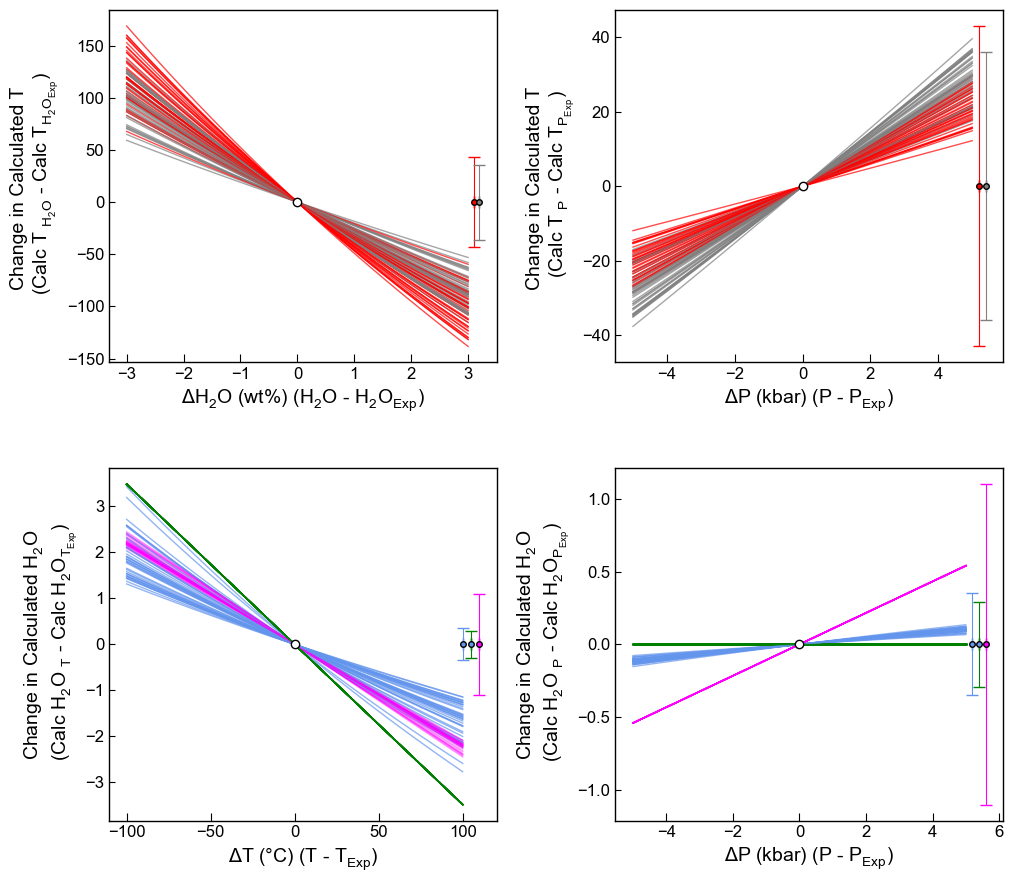

In [35]:
fig, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, figsize=(10.3,9))

# Hygrometry
for i in range(0, np.shape(HT_Pet_WL)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax1.plot(delta_T_lin, -(HT_Exp_WL.iloc[i]-HT_Pet_WL[:, i]), '-', color='cornflowerblue', alpha=0.7, lw=1)
    ax1.plot(delta_T_lin, -(HT_Exp_Mas.iloc[i]-HT_Pet_Mas[:, i]), '-', color='green', alpha=0.7, lw=1)
    ax1.plot(delta_T_lin, -(HT_Exp_25b.iloc[i]-HT_Pet_25b[:, i]), '-', color='magenta', alpha=0.3, lw=1)



#ax1.set_title('a) Sensitivity of Temp to H$_2$O')

for i in range(0, np.shape(HT_Pet_WL)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax2.plot(delta_P_lin, -(HT_Exp_WL.iloc[i]-HP_Pet_WL[:, i]), '-', color='cornflowerblue', alpha=0.7, lw=1)
    ax2.plot(delta_P_lin, -(HT_Exp_Mas.iloc[i]-HP_Pet_Mas[:, i]), '-', color='green', alpha=0.7, lw=1)
    ax2.plot(delta_P_lin, -(HT_Exp_25b.iloc[i]-HP_Pet_25b[:, i]), '-', color='magenta', alpha=0.3, lw=1)

############################## Thermometry ##########################




for i in range(0, np.shape(HT_Pet_WL)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax3.plot(delta_H_lin, -(TH_Pet_T24a_Exp.iloc[i]-TH_Pet_T24a[:, i]), '-', color='grey', alpha=0.7, lw=1)
    ax3.plot(delta_H_lin, -(TH_Pet_T23_Exp.iloc[i]-TH_Pet_T23[:, i]), '-', color='red', alpha=0.7, lw=1)

# Error for eq23 is 43
ax3.errorbar(3.1, 0, xerr=0, yerr=43, fmt='o', 
             ecolor='red', elinewidth=0.8, mfc='red', capsize=4, ms=4, mec='k')
ax4.errorbar(5.2, 0, xerr=0, yerr=43, fmt='o', 
             ecolor='red', elinewidth=0.8, mfc='red', capsize=4, ms=4, mec='k')

# Error for 24a is 36 C
ax3.errorbar(3.2, 0, xerr=0, yerr=36, fmt='o', 
             ecolor='grey', elinewidth=0.8, mfc='grey', ms=4,  capsize=4,mec='k')
ax4.errorbar(5.4, 0, xerr=0, yerr=36, fmt='o', 
             ecolor='grey', elinewidth=0.8, mfc='grey', ms=4,  capsize=4,mec='k')

#ax1.set_title('a) Sensitivity of Temp to H$_2$O')


### ERRORS FOR WATER

# Error for WL2015 is -+0.35
ax1.errorbar(100, 0, xerr=0, yerr=0.35, fmt='o', 
             ecolor='cornflowerblue', elinewidth=0.8, mfc='cornflowerblue', capsize=4, ms=4, mec='k')
ax2.errorbar(5.2, 0, xerr=0, yerr=0.35, fmt='o', 
             ecolor='cornflowerblue', elinewidth=0.8, mfc='cornflowerblue', capsize=4, ms=4, mec='k')


# Error for Masotta is 0.29
ax1.errorbar(105, 0, xerr=0, yerr=0.29, fmt='o', 
             ecolor='green', elinewidth=0.8, mfc='cornflowerblue', capsize=4, ms=4, mec='k')
ax2.errorbar(5.4, 0, xerr=0, yerr=0.29, fmt='o', 
             ecolor='green', elinewidth=0.8, mfc='cornflowerblue', capsize=4, ms=4, mec='k')

# Error for Putirka is 1.1
ax1.errorbar(110, 0, xerr=0, yerr=1.1, fmt='o', 
             ecolor='magenta', elinewidth=0.8, mfc='magenta', capsize=4, ms=4, mec='k')
ax2.errorbar(5.6, 0, xerr=0, yerr=1.1, fmt='o', 
             ecolor='magenta', elinewidth=0.8, mfc='magenta', capsize=4, ms=4, mec='k')





for i in range(0, np.shape(HT_Pet_WL)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    ax4.plot(delta_P_lin, -(TH_Pet_T24a_Exp.iloc[i]-TP_Pet_T24a[:, i]), '-', color='grey', alpha=0.7, lw=1)
    ax4.plot(delta_P_lin, -(TH_Pet_T23_Exp.iloc[i]-TP_Pet_T23[:, i]), '-', color='red', alpha=0.7, lw=1)

ax1.set_xlabel('ΔT (°C) (T - T$_{Exp}$)')
ax1.set_ylabel('Change in Calculated H$_2$O \n (Calc H$_2$O $_{T}$ - Calc H$_2$O$_{T_{Exp} }$)')
   
    
ax2.set_xlabel('ΔP (kbar) (P - P$_{Exp}$)')
ax2.set_ylabel('Change in Calculated H$_2$O \n (Calc H$_2$O $_{P}$ - Calc H$_2$O$_{P_{Exp} }$)')

  

ax4.set_xlabel('ΔP (kbar) (P - P$_{Exp}$)')
ax4.set_ylabel('Change in Calculated T \n (Calc T $_{P}$ - Calc T$_{P_{Exp} }$)')

ax3.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax3.set_ylabel('Change in Calculated T \n (Calc T $_{H{_2}O}$ - Calc T$_{H{_2}O_{Exp} }$)')

ax1.plot(0, 0, 'ok', mfc='white')
ax2.plot(0, 0, 'ok', mfc='white')
ax3.plot(0, 0, 'ok', mfc='white')
ax4.plot(0, 0, 'ok', mfc='white')

fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
fig.savefig('PlagSensitivity.png', dpi=200)

In [37]:
# Top right, change in Pressure with T
print(-np.average(TP_Pet_T24a[0, :]-TP_Pet_T24a[-1, :])/10)
print(-np.average(TP_Pet_T23[0, :]-TP_Pet_T23[-1, :])/10)


5.781440869714447
4.237294980568724


In [38]:
# Change in calc T with H2O
print(-np.average(TH_Pet_T24a[0, :]-TH_Pet_T24a[-1, :])/6)
print(-np.average(TH_Pet_T23[0, :]-TH_Pet_T23[-1, :])/6)

-31.3785567415911
-37.35296953887592


In [39]:
print(-np.average(HT_Pet_WL[0]-HT_Pet_WL[-1])/20)
print(-np.average(HT_Pet_Mas[0]-HT_Pet_Mas[-1])/20)
print(-np.average(HT_Pet_25b[0]-HT_Pet_25b[-1])/20)


-0.17916076957214533
-0.34827940254407797
-0.22321752647900714


In [40]:
print(-np.average(HP_Pet_WL[0]-HP_Pet_WL[-1])/10)
print(-np.average(HP_Pet_Mas[0]-HP_Pet_Mas[-1])/10)
print(-np.average(HP_Pet_25b[0]-HP_Pet_25b[-1])/10)


0.021502522233558596
-0.0
0.10800000000000001
